<a href="https://www.kaggle.com/code/michaelrocchio/ridge-vs-linear-vs-lasso-vs-elastic-regression?scriptVersionId=93957101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

train_var=train[['Id', 'LotArea', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars', 'PavedDrive', 'SalePrice']]

test_var=test[['Id', 'LotArea', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars', 'PavedDrive']]
test_var=test_var.set_index(['Id'])
train_var

,Id,LotArea,Street,LandContour,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,GarageCars,PavedDrive,SalePrice
0,1,8450,Pave,Lvl,AllPub,Gtl,CollgCr,1Fam,2Story,7,...,1,0,2,1,1,Gd,Typ,2,Y,208500
1,2,9600,Pave,Lvl,AllPub,Gtl,Veenker,1Fam,1Story,6,...,0,1,2,0,1,TA,Typ,2,Y,181500
2,3,11250,Pave,Lvl,AllPub,Gtl,CollgCr,1Fam,2Story,7,...,1,0,2,1,1,Gd,Typ,2,Y,223500
3,4,9550,Pave,Lvl,AllPub,Gtl,Crawfor,1Fam,2Story,7,...,1,0,1,0,1,Gd,Typ,3,Y,140000
4,5,14260,Pave,Lvl,AllPub,Gtl,NoRidge,1Fam,2Story,8,...,1,0,2,1,1,Gd,Typ,3,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,Pave,Lvl,AllPub,Gtl,Gilbert,1Fam,2Story,6,...,0,0,2,1,1,TA,Typ,2,Y,175000
1456,1457,13175,Pave,Lvl,AllPub,Gtl,NWAmes,1Fam,1Story,6,...,1,0,2,0,1,TA,Min1,2,Y,210000
1457,1458,9042,Pave,Lvl,AllPub,Gtl,Crawfor,1Fam,2Story,7,...,0,0,2,0,1,Gd,Typ,1,Y,266500
1458,1459,9717,Pave,Lvl,AllPub,Gtl,NAmes,1Fam,1Story,5,...,1,0,1,0,1,Gd,Typ,1,Y,142125


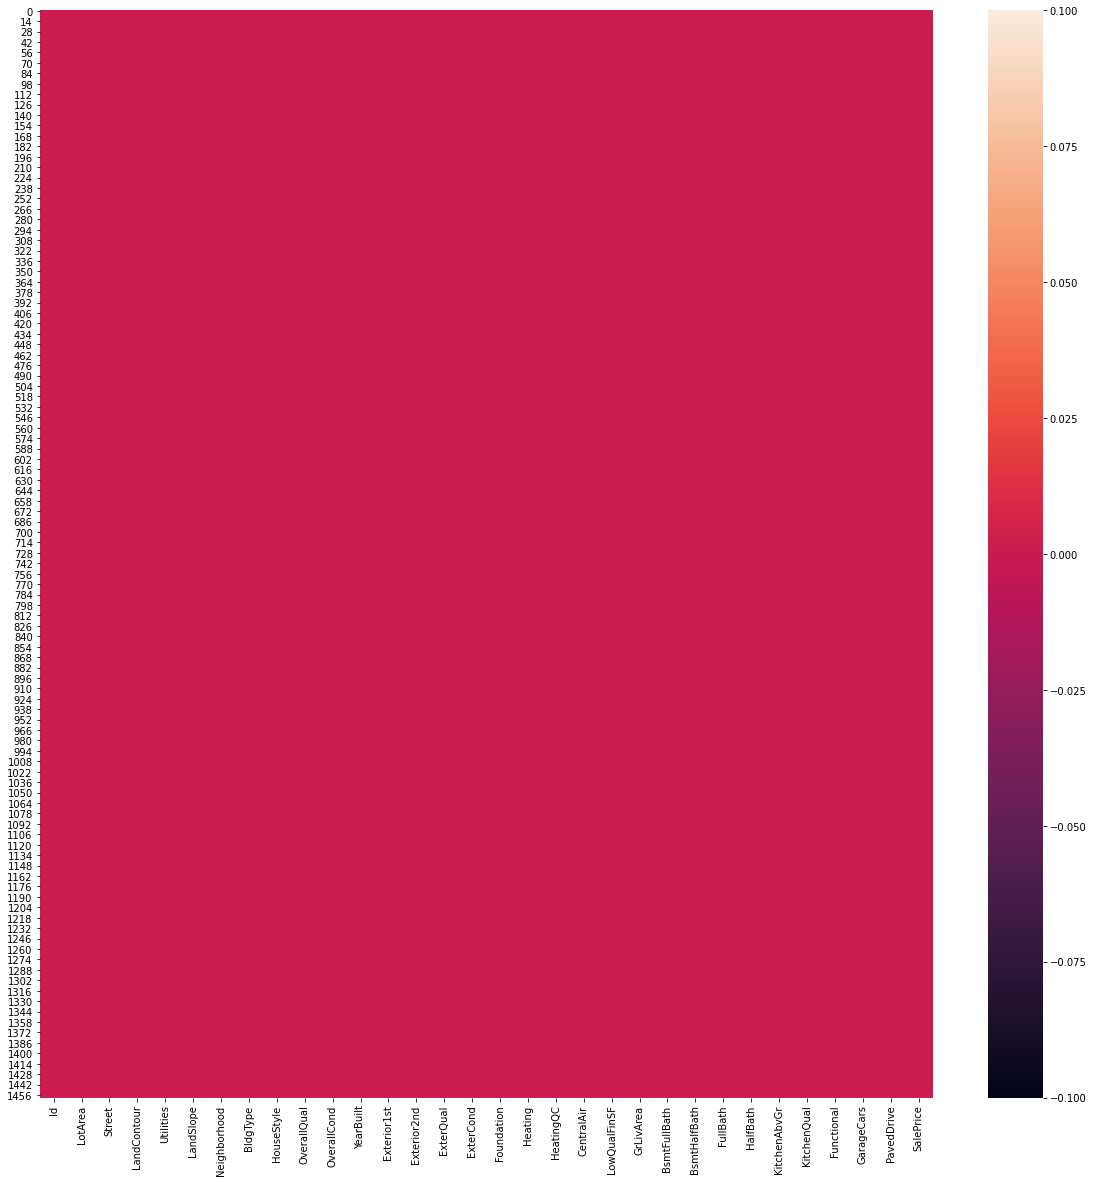

In [2]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_var.isnull())
plt.show()

In [3]:
train_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   Street        1460 non-null   object
 3   LandContour   1460 non-null   object
 4   Utilities     1460 non-null   object
 5   LandSlope     1460 non-null   object
 6   Neighborhood  1460 non-null   object
 7   BldgType      1460 non-null   object
 8   HouseStyle    1460 non-null   object
 9   OverallQual   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  YearBuilt     1460 non-null   int64 
 12  Exterior1st   1460 non-null   object
 13  Exterior2nd   1460 non-null   object
 14  ExterQual     1460 non-null   object
 15  ExterCond     1460 non-null   object
 16  Foundation    1460 non-null   object
 17  Heating       1460 non-null   object
 18  HeatingQC     1460 non-null   object
 19  Centra

In [4]:
test_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   Street        1459 non-null   object 
 2   LandContour   1459 non-null   object 
 3   Utilities     1457 non-null   object 
 4   LandSlope     1459 non-null   object 
 5   Neighborhood  1459 non-null   object 
 6   BldgType      1459 non-null   object 
 7   HouseStyle    1459 non-null   object 
 8   OverallQual   1459 non-null   int64  
 9   OverallCond   1459 non-null   int64  
 10  YearBuilt     1459 non-null   int64  
 11  Exterior1st   1458 non-null   object 
 12  Exterior2nd   1458 non-null   object 
 13  ExterQual     1459 non-null   object 
 14  ExterCond     1459 non-null   object 
 15  Foundation    1459 non-null   object 
 16  Heating       1459 non-null   object 
 17  HeatingQC     1459 non-null   object 
 18  CentralAir    1459 non-nu

In [5]:
bad_var=['GarageCars', 'BsmtFullBath', 'BsmtHalfBath']
test_var['GarageCars']=test_var['GarageCars'].fillna(0)
test_var['GarageCars']=test_var.GarageCars.apply(
  lambda x:0 if type(x) != 'int32' else x)
test_var['GarageCars']=pd.to_numeric(test_var['GarageCars'])

test_var['BsmtFullBath']=test_var['BsmtFullBath'].fillna(0)
test_var['BsmtFullBath']=test_var.BsmtFullBath.apply(
  lambda x:0 if type(x) != 'int32' else x)
test_var['BsmtFullBath']=pd.to_numeric(test_var['BsmtFullBath'])

test_var['BsmtHalfBath']=test_var['BsmtHalfBath'].fillna(0)
test_var['BsmtHalfBath']=test_var.BsmtHalfBath.apply(
  lambda x:0 if type(x) != 'int32' else x)
test_var['BsmtHalfBath']=pd.to_numeric(test_var['BsmtHalfBath'])

test_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1459 non-null   int64 
 1   Street        1459 non-null   object
 2   LandContour   1459 non-null   object
 3   Utilities     1457 non-null   object
 4   LandSlope     1459 non-null   object
 5   Neighborhood  1459 non-null   object
 6   BldgType      1459 non-null   object
 7   HouseStyle    1459 non-null   object
 8   OverallQual   1459 non-null   int64 
 9   OverallCond   1459 non-null   int64 
 10  YearBuilt     1459 non-null   int64 
 11  Exterior1st   1458 non-null   object
 12  Exterior2nd   1458 non-null   object
 13  ExterQual     1459 non-null   object
 14  ExterCond     1459 non-null   object
 15  Foundation    1459 non-null   object
 16  Heating       1459 non-null   object
 17  HeatingQC     1459 non-null   object
 18  CentralAir    1459 non-null   object
 19  Low

In [6]:
train_var_cat=train_var.select_dtypes(['object'])

train_var_num=train_var.select_dtypes(['int32', 'int64'])

train_dummies = pd.get_dummies(train_var_cat)

train_var_fin=pd.concat([train_var_num, train_dummies], axis=1)
train_var_fin=train_var_fin.set_index(['Id'])
train_var_price=train_var_fin[['SalePrice']]
del train_var_fin['SalePrice']
train_var_price

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


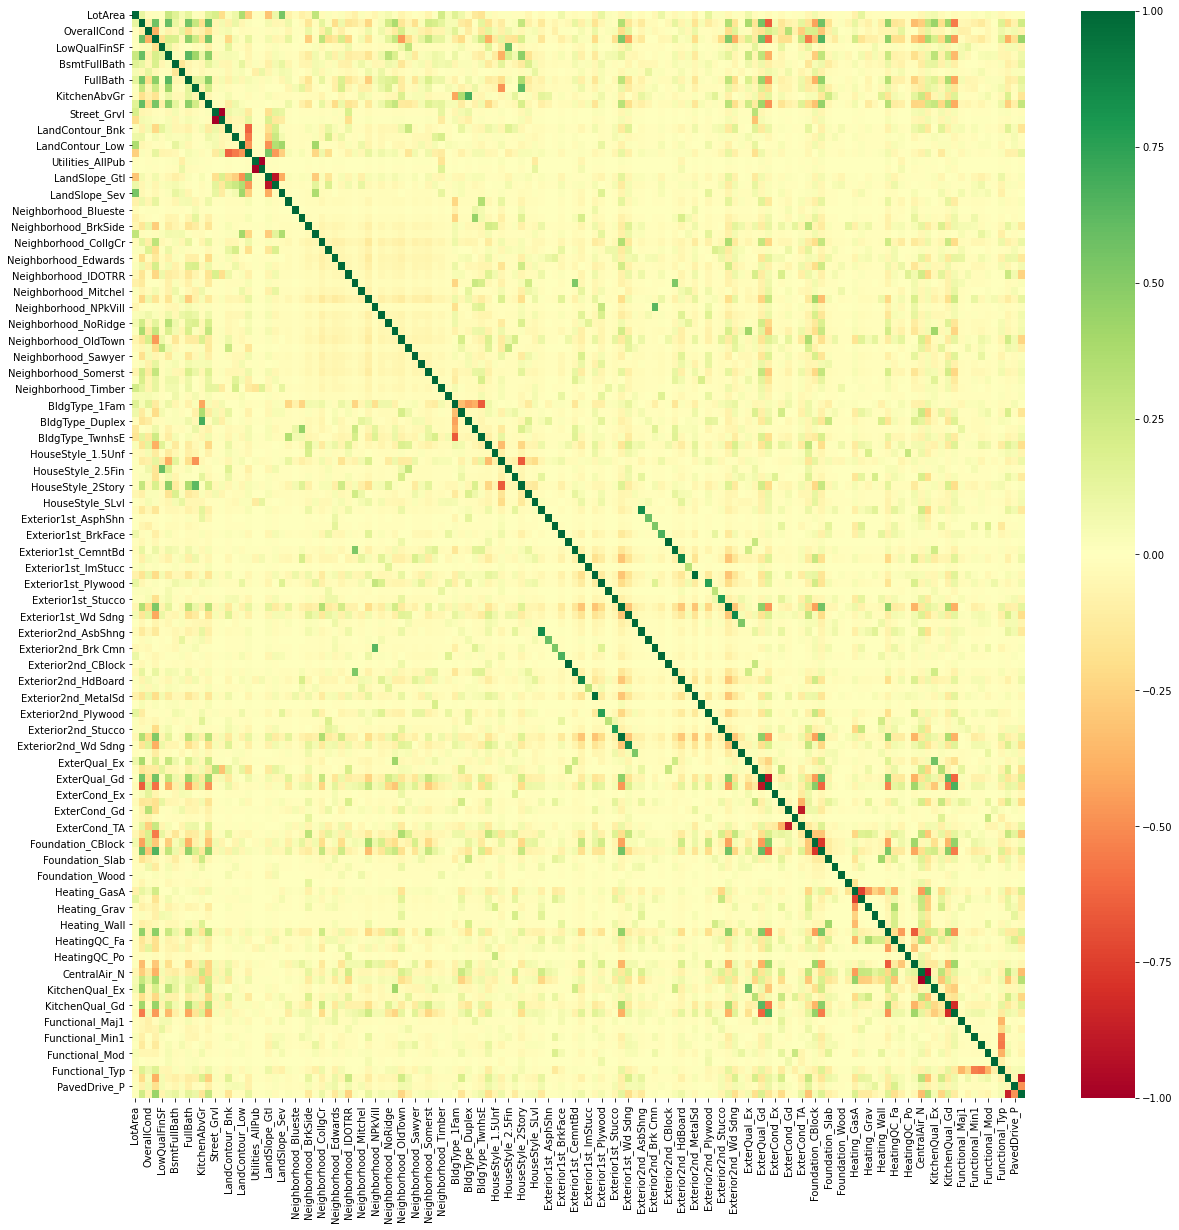

In [7]:
plt.figure(figsize=(20, 20))
g = sns.heatmap(round(train_var_fin.corr(),2),annot=False,cmap="RdYlGn")

In [8]:
regr = skl_lm.LinearRegression()

y = train_var_price['SalePrice'].to_numpy()

X = train_var_fin.to_numpy()

In [9]:
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 4.93788383e-01  1.08985693e+04  5.59064573e+03  2.22100973e+02
 -2.25255302e+01  5.85801974e+01  1.36170148e+04  8.21016077e+03
  6.64178851e+03  5.64422047e+03 -1.82842382e+04  9.72384310e+03
 -1.60383608e+04  1.60383608e+04 -1.73484983e+04  9.68020412e+03
  4.84832494e+03  2.81996922e+03  1.88906334e+04 -1.88906334e+04
 -8.16725398e+02  1.07764501e+04 -9.95972469e+03  5.26391188e+03
 -2.10948211e+03  7.62746740e+03 -7.25579017e+03 -2.86216794e+03
 -7.75001809e+03  1.32384182e+04 -2.39711030e+04 -1.39210654e+04
 -1.62674179e+04  1.28919641e+03 -1.82235908e+04 -1.85463860e+04
  2.86470916e+03 -2.16706714e+04  4.44586742e+04  3.82847487e+04
 -1.97597718e+04 -1.31827975e+04 -1.67519384e+04 -9.60282256e+03
  1.07284116e+04  5.16953209e+04  1.67312308e+03  1.47510416e+04
  1.49739782e+04  1.47171946e+04  4.58447609e+03 -2.17589245e+04
 -1.25167244e+04 -3.98107941e+03  6.39277619e+03  1.07008528e+04
 -1.08529472e+04 -7.32642079e+03 -1.05499666e+04  1.18894525e+04
  3.72733259e+03  1.46934

In [10]:
test_var_cat=test_var.select_dtypes(['object'])

test_var_num=test_var.select_dtypes(['int32', 'int64'])

test_dummies = pd.get_dummies(test_var_cat)

test_var_fin=pd.concat([test_var_num, test_dummies], axis=1)
test_var_fin

,LotArea,OverallQual,OverallCond,YearBuilt,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1461,11622,5,6,1961,0,896,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1462,14267,6,6,1958,0,1329,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1463,13830,5,5,1997,0,1629,0,0,2,1,...,0,0,0,0,0,0,1,0,0,1
1464,9978,6,6,1998,0,1604,0,0,2,1,...,0,0,0,0,0,0,1,0,0,1
1465,5005,8,5,1992,0,1280,0,0,2,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,4,7,1970,0,1092,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
2916,1894,4,5,1970,0,1092,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
2917,20000,5,7,1960,0,1224,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
coeff_df0=train_var_fin[0:0]
coeff_df0=coeff_df0.T.reset_index()
coeff_df0['coeff']=regr.coef_
coeff_df1=test_var_fin[0:0].T.reset_index()
coeff_df=pd.merge(coeff_df1, coeff_df0, how='left', left_on='index', right_on='index').fillna(0)
coeff_df=coeff_df.set_index(['index'])
coeff_df

Id,coeff
index,
LotArea,0.493788
OverallQual,10898.569270
OverallCond,5590.645730
YearBuilt,222.100973
LowQualFinSF,-22.525530
...,...
Functional_Sev,-55277.846028
Functional_Typ,20459.440387
PavedDrive_N,535.816508


In [12]:
#double check
test_var_check=test_var_fin[0:0].T.reset_index()
test_var_check['name']=test_var_check['index']
test_var_check0=pd.merge(test_var_check, coeff_df, how='left', left_on='index', right_on='index').fillna(0)
test_var_check0['not_alligned']=np.where(test_var_check0['index']!=test_var_check0['name'],1,0)
print(test_var_check0['not_alligned'].sum())

0


In [13]:
# #allign x
train_var_check0=train_var_fin[0:0].T.reset_index()
train_var_mod=pd.merge(train_var_check0, coeff_df, how='left', left_on='index', right_on='index').fillna(0)
train_var_mod

Id,index,coeff
0,LotArea,0.493788
1,OverallQual,10898.569270
2,OverallCond,5590.645730
3,YearBuilt,222.100973
4,LowQualFinSF,-22.525530
...,...,...
129,Functional_Sev,-55277.846028
130,Functional_Typ,20459.440387
131,PavedDrive_N,535.816508
132,PavedDrive_P,-1697.292179


In [14]:
train_var_fin

,LotArea,OverallQual,OverallCond,YearBuilt,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,0,1710,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
2,9600,6,8,1976,0,1262,0,1,2,0,...,0,0,0,0,0,0,1,0,0,1
3,11250,7,5,2001,0,1786,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
4,9550,7,5,1915,0,1717,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,14260,8,5,2000,0,2198,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,5,1999,0,1647,0,0,2,1,...,0,0,0,0,0,0,1,0,0,1
1457,13175,6,6,1978,0,2073,1,0,2,0,...,0,0,1,0,0,0,0,0,0,1
1458,9042,7,9,1941,0,2340,0,0,2,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
mod_check = train_var_fin.mul(train_var_mod['coeff'].to_numpy(), axis='columns')
mod_check['beta_zero']=regr.intercept_
mod_check['house_price_model']=mod_check.sum(axis=1)
mod_check_fin=mod_check[['house_price_model']].reset_index()
train_var_price=train_var_price.reset_index()
mod_check_fin=pd.merge(mod_check_fin, train_var_price, how='inner')
mod_check_fin=mod_check_fin.set_index(['Id'])

In [16]:
import sklearn
from sklearn import metrics
linear_mse = sklearn.metrics.mean_squared_error(mod_check_fin['SalePrice'].to_numpy(), mod_check_fin['house_price_model'].to_numpy())
linear_mse

826596480.5097184

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto")
ridge_reg.fit(X, y)

Ridge(alpha=1)

In [18]:
train_var_fin

,LotArea,OverallQual,OverallCond,YearBuilt,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,0,1710,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
2,9600,6,8,1976,0,1262,0,1,2,0,...,0,0,0,0,0,0,1,0,0,1
3,11250,7,5,2001,0,1786,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
4,9550,7,5,1915,0,1717,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,14260,8,5,2000,0,2198,1,0,2,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,5,1999,0,1647,0,0,2,1,...,0,0,0,0,0,0,1,0,0,1
1457,13175,6,6,1978,0,2073,1,0,2,0,...,0,0,1,0,0,0,0,0,0,1
1458,9042,7,9,1941,0,2340,0,0,2,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[ 4.92807137e-01  1.09998940e+04  5.63324368e+03  2.42631883e+02
 -2.48480589e+01  5.85726310e+01  1.36987263e+04  8.14133656e+03
  6.65506808e+03  5.61440880e+03 -1.70148150e+04  9.81484179e+03
 -1.40312615e+04  1.40312615e+04 -1.70920592e+04  9.71995667e+03
  4.57086527e+03  2.80123726e+03  1.18128754e+04 -1.18128754e+04
 -1.33962403e+03  1.03518435e+04 -9.01221945e+03  3.55663560e+03
 -1.93393473e+03  6.72438263e+03 -5.57262599e+03 -2.06801884e+03
 -8.10475324e+03  1.34752228e+04 -2.28017573e+04 -1.41201749e+04
 -1.46742235e+04  1.03367306e+03 -1.71841477e+04 -1.75456107e+04
  3.97352484e+03 -2.07417873e+04  4.23322959e+04  3.64757174e+04
 -1.83793566e+04 -1.16654139e+04 -1.54909333e+04 -9.51470609e+03
  9.62209089e+03  4.89281297e+04  3.34157104e+02  1.33416141e+04
  1.49125758e+04  1.35369966e+04  3.49461505e+03 -2.02420442e+04
 -1.17021432e+04 -3.98521399e+03  5.10585099e+03  1.05859360e+04
 -8.52588446e+03 -7.41556007e+03 -1.05097340e+04  1.12454420e+04
  3.49916356e+03  8.31189

In [20]:
ridge_rmse=train_var_fin.mul(ridge_reg.coef_, axis='columns').fillna(0)
ridge_rmse['intercept']=ridge_reg.intercept_
ridge_rmse['ridge_model_price']=ridge_rmse.sum(axis=1)
# train_var_price=train_var_price.set_index(['Id'])
ridge_rmse=pd.merge(ridge_rmse, train_var_price, right_index=True, left_index=True, how='inner')
ridge_rmse=ridge_rmse.reset_index()
final_train=ridge_rmse[['Id', 'SalePrice', 'ridge_model_price']]
final_train=final_train.set_index(['Id'])
ridge_rmse=ridge_rmse.set_index(['Id'])
mod_check_finjn=mod_check_fin
del mod_check_finjn['SalePrice']
final_train=pd.merge(final_train, mod_check_finjn, how='inner', right_index=True, left_index=True)
# del final_train['index']
final_train

,SalePrice,ridge_model_price,house_price_model
Id,,,
2,181500,214797.437884,217751.890471
3,223500,215731.418245,219796.601209
4,140000,220143.554057,191584.246016
5,250000,191402.113388,318026.949315
6,143000,316767.980632,140299.163279
...,...,...,...
1456,175000,219137.991729,177953.458132
1457,210000,177766.675194,208519.313696
1458,266500,208400.237101,274445.442188


In [21]:
ridge_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['ridge_model_price'].to_numpy())
linear_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['house_price_model'].to_numpy())
print('ridge_mse: ', ridge_mse)
print('linear_mse: ', linear_mse)

ridge_mse:  11836345405.18292
linear_mse:  827139122.3570852


In [22]:
rcoeff_df0=train_var_fin[0:0]
rcoeff_df0=rcoeff_df0.T.reset_index()
rcoeff_df0['r_coeff']=ridge_reg.coef_
rcoeff_df1=test_var_fin[0:0].T.reset_index()
rcoeff_df=pd.merge(rcoeff_df1, rcoeff_df0, how='left', left_on='index', right_on='index').fillna(0)
rcoeff_df=rcoeff_df.set_index(['index'])
rcoeff_df

Id,r_coeff
index,
LotArea,0.492807
OverallQual,10999.894033
OverallCond,5633.243684
YearBuilt,242.631883
LowQualFinSF,-24.848059
...,...
Functional_Sev,-29547.016754
Functional_Typ,16263.222879
PavedDrive_N,726.171614


In [23]:
coeff_df

Id,coeff
index,
LotArea,0.493788
OverallQual,10898.569270
OverallCond,5590.645730
YearBuilt,222.100973
LowQualFinSF,-22.525530
...,...
Functional_Sev,-55277.846028
Functional_Typ,20459.440387
PavedDrive_N,535.816508


In [24]:
print(ridge_reg.coef_)
print(ridge_reg.intercept_)
print(regr.coef_)
print(regr.intercept_)

[ 4.92807137e-01  1.09998940e+04  5.63324368e+03  2.42631883e+02
 -2.48480589e+01  5.85726310e+01  1.36987263e+04  8.14133656e+03
  6.65506808e+03  5.61440880e+03 -1.70148150e+04  9.81484179e+03
 -1.40312615e+04  1.40312615e+04 -1.70920592e+04  9.71995667e+03
  4.57086527e+03  2.80123726e+03  1.18128754e+04 -1.18128754e+04
 -1.33962403e+03  1.03518435e+04 -9.01221945e+03  3.55663560e+03
 -1.93393473e+03  6.72438263e+03 -5.57262599e+03 -2.06801884e+03
 -8.10475324e+03  1.34752228e+04 -2.28017573e+04 -1.41201749e+04
 -1.46742235e+04  1.03367306e+03 -1.71841477e+04 -1.75456107e+04
  3.97352484e+03 -2.07417873e+04  4.23322959e+04  3.64757174e+04
 -1.83793566e+04 -1.16654139e+04 -1.54909333e+04 -9.51470609e+03
  9.62209089e+03  4.89281297e+04  3.34157104e+02  1.33416141e+04
  1.49125758e+04  1.35369966e+04  3.49461505e+03 -2.02420442e+04
 -1.17021432e+04 -3.98521399e+03  5.10585099e+03  1.05859360e+04
 -8.52588446e+03 -7.41556007e+03 -1.05097340e+04  1.12454420e+04
  3.49916356e+03  8.31189

In [25]:
result2 = test_var_fin.mul(rcoeff_df['r_coeff'], axis='columns')
result2['beta_zero']=ridge_reg.intercept_
result2['ridge_house_price']=result2.sum(axis=1)
result2

,LotArea,OverallQual,OverallCond,YearBuilt,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,beta_zero,ridge_house_price
Id,,,,,,,,,,,,,,,,,,,,,
1461,5727.404549,54999.470164,33799.462102,475801.121615,-0.0,52481.077355,0.0,0.0,6655.068085,0.000000,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,101368.645386
1462,7030.879427,65999.364197,33799.462102,475073.225967,-0.0,77843.026568,0.0,0.0,6655.068085,5614.408796,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,141063.490478
1463,6815.522708,54999.470164,28166.218418,484535.869385,-0.0,95414.815862,0.0,0.0,13310.136170,5614.408796,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,145172.031605
1464,4917.229615,65999.364197,33799.462102,484778.501268,-0.0,93950.500087,0.0,0.0,13310.136170,5614.408796,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,161653.691671
1465,2466.499722,87999.152263,28166.218418,483322.709973,-0.0,74972.967651,0.0,0.0,13310.136170,0.000000,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,211355.267853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,954.074618,43999.576131,39432.705785,477984.808557,-0.0,63961.313027,0.0,0.0,6655.068085,5614.408796,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,70039.512673
2916,933.376718,43999.576131,28166.218418,477984.808557,-0.0,63961.313027,0.0,0.0,6655.068085,5614.408796,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,67405.637979
2917,9856.142745,54999.470164,39432.705785,475558.489732,-0.0,71692.900316,0.0,0.0,6655.068085,0.000000,...,0.0,0.0,0.0,-0.0,16263.222879,0.0,-0.0,1057.967383,-557710.52912,133687.335131


In [26]:
result1 = test_var_fin.mul(coeff_df['coeff'], axis='columns')
result1['beta_zero']=regr.intercept_
result1['linear_house_price']=result1.sum(axis=1)
result1=result1.reset_index()
result1_fin=result1[['Id', 'linear_house_price']]
result2 = test_var_fin.mul(rcoeff_df['r_coeff'], axis='columns')
result2['beta_zero']=ridge_reg.intercept_
result2['ridge_house_price']=result2.sum(axis=1)
result2=result2.reset_index()
result2_fin=result2[['Id', 'ridge_house_price']]
final_result=pd.merge(result1_fin, result2_fin, how='inner')
final_result

,Id,linear_house_price,ridge_house_price
0,1461,101441.978657,101368.645386
1,1462,141068.591159,141063.490478
2,1463,145560.341906,145172.031605
3,1464,162000.816155,161653.691671
4,1465,212975.595925,211355.267853
...,...,...,...
1454,2915,69406.717640,70039.512673
1455,2916,67622.632629,67405.637979
1456,2917,133776.822936,133687.335131
1457,2918,98167.360769,99423.964631


In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lcoeff_df0=train_var_fin[0:0]
lcoeff_df0=lcoeff_df0.T.reset_index()
lcoeff_df0['l_coeff']=lasso_reg.coef_
lcoeff_df1=test_var_fin[0:0].T.reset_index()
lcoeff_df=pd.merge(lcoeff_df1, lcoeff_df0, how='left', left_on='index', right_on='index').fillna(0)
lcoeff_df=lcoeff_df.set_index(['index'])

result3 = test_var_fin.mul(lcoeff_df['l_coeff'], axis='columns')
result3['beta_zero']=lasso_reg.intercept_
result3['lasso_house_price']=result3.sum(axis=1)
result3=result3.reset_index()
result3_fin=result3[['Id', 'lasso_house_price']]
final_result=pd.merge(final_result, result3_fin, how='inner')
final_result

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587398875126.7362, tolerance: 920791133.4609975
  positive)


,Id,linear_house_price,ridge_house_price,lasso_house_price
0,1461,101441.978657,101368.645386,101443.261228
1,1462,141068.591159,141063.490478,141069.639891
2,1463,145560.341906,145172.031605,145559.040116
3,1464,162000.816155,161653.691671,161997.849977
4,1465,212975.595925,211355.267853,212975.923010
...,...,...,...,...
1454,2915,69406.717640,70039.512673,69408.818502
1455,2916,67622.632629,67405.637979,67614.469286
1456,2917,133776.822936,133687.335131,133770.086047
1457,2918,98167.360769,99423.964631,98183.617334


In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X, y)

ecoeff_df0=train_var_fin[0:0]
ecoeff_df0=ecoeff_df0.T.reset_index()
ecoeff_df0['e_coeff']=elastic_net.coef_
ecoeff_df1=test_var_fin[0:0].T.reset_index()
ecoeff_df=pd.merge(ecoeff_df1, ecoeff_df0, how='left', left_on='index', right_on='index').fillna(0)
ecoeff_df=ecoeff_df.set_index(['index'])
resulte = test_var_fin.mul(ecoeff_df['e_coeff'], axis='columns')
resulte['beta_zero']=elastic_net.intercept_
resulte['elastic_house_price']=resulte.sum(axis=1)
resulte=resulte.reset_index()
resulte_fin=resulte[['Id', 'elastic_house_price']]
# final_result=pd.merge(final_result, resulte_fin, how='inner')
final_result

,Id,linear_house_price,ridge_house_price,lasso_house_price
0,1461,101441.978657,101368.645386,101443.261228
1,1462,141068.591159,141063.490478,141069.639891
2,1463,145560.341906,145172.031605,145559.040116
3,1464,162000.816155,161653.691671,161997.849977
4,1465,212975.595925,211355.267853,212975.923010
...,...,...,...,...
1454,2915,69406.717640,70039.512673,69408.818502
1455,2916,67622.632629,67405.637979,67614.469286
1456,2917,133776.822936,133687.335131,133770.086047
1457,2918,98167.360769,99423.964631,98183.617334


In [29]:
lasso_train=train_var_fin.mul(lasso_reg.coef_, axis='columns').fillna(0)
lasso_train['intercept']=lasso_reg.intercept_
lasso_train['lasso_model_price']=lasso_train.sum(axis=1)
lasso_train=lasso_train.reset_index()
lasso_train_fin=lasso_train[['Id', 'lasso_model_price']]
lasso_train_fin=lasso_train_fin.set_index(['Id'])
final_train=pd.merge(final_train, lasso_train_fin, right_index=True, left_index=True, how='inner')
# final_train=final_train.reset_index()
save=final_train
final_train

,SalePrice,ridge_model_price,house_price_model,lasso_model_price
Id,,,,
2,181500,214797.437884,217751.890471,217732.248914
3,223500,215731.418245,219796.601209,219801.629080
4,140000,220143.554057,191584.246016,191584.221045
5,250000,191402.113388,318026.949315,318025.500266
6,143000,316767.980632,140299.163279,140355.826934
...,...,...,...,...
1456,175000,219137.991729,177953.458132,177952.717745
1457,210000,177766.675194,208519.313696,208514.128403
1458,266500,208400.237101,274445.442188,274459.130926


In [30]:
elastic_train=train_var_fin.mul(elastic_net.coef_, axis='columns').fillna(0)
elastic_train['intercept']=elastic_net.intercept_
elastic_train['elastic_model_price']=elastic_train.sum(axis=1)
elastic_train=elastic_train.reset_index()
elastic_train_fin=elastic_train[['Id', 'elastic_model_price']]
elastic_train_fin=elastic_train_fin.set_index(['Id'])
final_train=pd.merge(final_train, elastic_train_fin, right_index=True, left_index=True, how='inner')
# final_train=final_train.reset_index()
final_train

,SalePrice,ridge_model_price,house_price_model,lasso_model_price,elastic_model_price
Id,,,,,
2,181500,214797.437884,217751.890471,217732.248914,178909.275900
3,223500,215731.418245,219796.601209,219801.629080,231821.002264
4,140000,220143.554057,191584.246016,191584.221045,174410.588579
5,250000,191402.113388,318026.949315,318025.500266,285585.397205
6,143000,316767.980632,140299.163279,140355.826934,171927.297094
...,...,...,...,...,...
1456,175000,219137.991729,177953.458132,177952.717745,195559.337877
1457,210000,177766.675194,208519.313696,208514.128403,228138.483952
1458,266500,208400.237101,274445.442188,274459.130926,248011.838888


In [31]:
ridge_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['ridge_model_price'].to_numpy(), squared=False)
linear_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['house_price_model'].to_numpy(), squared=False)
lasso_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['lasso_model_price'].to_numpy(), squared=False)
elastic_mse = sklearn.metrics.mean_squared_error(final_train['SalePrice'].to_numpy(), final_train['elastic_model_price'].to_numpy(), squared=False)
print('ridge_rmse: ', ridge_mse)
print('linear_rmse: ', linear_mse)
print('lasso_rmse: ', lasso_mse)
print('elastic_rmse: ', elastic_mse)

ridge_rmse:  108794.96957664413
linear_rmse:  28760.026466557454
lasso_rmse:  28668.988367706846
elastic_rmse:  36091.114951020514
